In [20]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import math


In [24]:
G = nx.DiGraph()
for i in range(1,1001):
  if 3*i<=1000:
    G.add_edge(i,3*i)
  if i+3<=1000:
    G.add_edge(i,i+3)
  if i%2==0:
    G.add_edge(i,int(i/2))

In [25]:
nx.dijkstra_path(G,78,220)

NetworkXNoPath: ignored

In [ ]:
def pomosty(N,M):
  if N>=M:
    raise ValueError("M powinno być większe od N!")
  return nx.dijkstra_path(G,N,M)

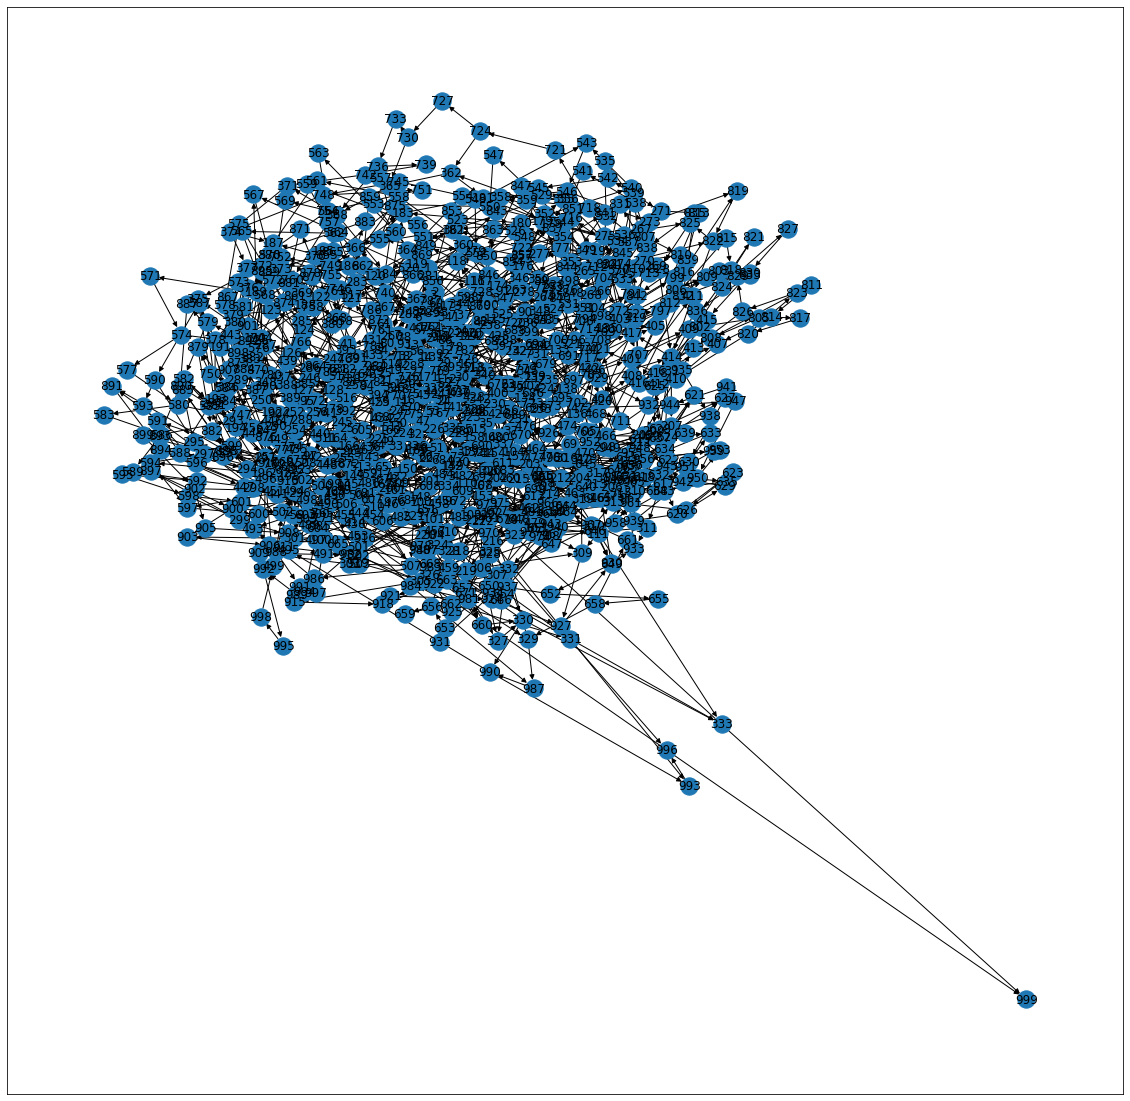

In [26]:
plt.figure(figsize=(20,20))
nx.draw_networkx(G)

In [3]:
class DiGraph:
    def __init__(self, num_of_nodes):
        self.m_num_of_nodes = num_of_nodes
        self.m_nodes = range(1,self.m_num_of_nodes+1)

        self.m_adj_list = {node: set() for node in self.m_nodes}      

    def add_edge(self, node1, node2):
        self.m_adj_list[node1].add(node2)
    def print_adj_list(self):
        for key in self.m_adj_list.keys():
            print("node", key, ": ", self.m_adj_list[key])

DG = DiGraph(1000)
for i in range(1,1001):
  if 3*i<=1000:
    DG.add_edge(i,3*i)
  if i+3<=1000:
    DG.add_edge(i,i+3)
  if i%2==0:
    DG.add_edge(i,int(i/2))

len(DG.m_adj_list[999])

0

In [170]:
import math
def l(v,w):
  if (w==3*v or w==v+3 or w==v/2):
    return 1
  else:
    return math.inf


def dijkstra_pomosty(s,e):

  if type(s)!=int or type(e)!=int:
    raise ValueError("Należy podać liczby naturalne mniejsze od 1000.")

  if s>=1000 or e>1000 or s<0 or e<0:
    raise ValueError("Należy podać liczby naturalne mniejsze od 1000.")

  if s>=e:
    raise ValueError("M powinno być większe od N!")

  #obsłużenie przypadku 999 - można wykasować
  #if all(l(s,v)==math.inf for v in range(1,1001)):
  #  return "Brak ciągu spełniającego założenia."

  #wierzchołki to liczby naturalne od 1 do 1000
  #w Pythonie trzeba wziąć range od 1 do 1001
  V = set(range(1,1001))
  #pomocnicza tablica odległości
  dist=[]
  #pomocnicza tablica poprzednich wierzchołków na ścieżce
  prev=[0 for i in V]
  #ścieżka
  path=[]
  #liczba kroków w ścieżce (maksymalnie możemy wykonać 999)
  j=0

  for v in V:
    dist.append(l(s,v))

  S = set([s])

  for w in V.difference(S):
    if dist[w-1] < math.inf:
      prev[w-1] = s

  while (S != V and j<999):

    #zaczynamy od minimalnego dystansu = nieskończoność
    mindist = math.inf
    #wykonujemy kolejny krok
    j+=1

    #szukamy wierzchołka(wierzchołków) minimalizujących długość ścieżki
    for w in V.difference(S):
      if dist[w-1] < mindist:
        v = w
        mindist = dist[w-1]
    
    #jeśli wybrany wierzchołek minimalizujący dystans to końcowy, przerywamy przeszukiwanie
    if v == e:
      break

    S = S.union(set([v]))

    #sprawdzamy, dla których wierzchołków v jest poprzednikiem i aktualizujemy odległość
    for w in V.difference(S):
      if dist[w-1] > mindist + l(v,w):
        dist[w-1] = mindist + l(v,w)
        prev[w-1] = v

  #dodajemy końcowy wierzchołek do ścieżki
  path.append(e)

  #dodajemy od końca do ścieżki, dopóki dany wierzchołek nie będzie miał poprzedników
  while prev[e-1] != 0:
    e=prev[e-1]
    path.append(e)

  #jeśli w ścieżce znajduje się wierzchołek początkowy, to znaczy, że znaleźliśmy ścieżkę 
  if s in path:
    return list(reversed(path))

  #wpp nie istnieje taka ścieżka
  else:
    return f'Brak ścieżki od {s} do {e}'



In [182]:
dijkstra_pomosty(60,997)

'Brak ścieżki od 60 do 997'

In [183]:
dijkstra_pomosty(17,60)

[17, 20, 60]

In [184]:
dijkstra_pomosty(17,997)

[17,
 20,
 10,
 13,
 16,
 19,
 22,
 25,
 28,
 31,
 34,
 37,
 40,
 43,
 46,
 49,
 52,
 55,
 58,
 61,
 64,
 67,
 70,
 73,
 76,
 79,
 82,
 85,
 88,
 91,
 94,
 97,
 100,
 103,
 106,
 109,
 112,
 115,
 118,
 121,
 124,
 127,
 130,
 133,
 136,
 139,
 142,
 145,
 148,
 151,
 154,
 157,
 160,
 163,
 166,
 169,
 172,
 175,
 178,
 181,
 184,
 187,
 190,
 193,
 196,
 199,
 202,
 205,
 208,
 211,
 214,
 217,
 220,
 223,
 226,
 229,
 232,
 235,
 238,
 241,
 244,
 247,
 250,
 253,
 256,
 259,
 262,
 265,
 268,
 271,
 274,
 277,
 280,
 283,
 286,
 289,
 292,
 295,
 298,
 301,
 304,
 307,
 310,
 313,
 316,
 319,
 322,
 325,
 328,
 331,
 334,
 337,
 340,
 343,
 346,
 349,
 352,
 355,
 358,
 361,
 364,
 367,
 370,
 373,
 376,
 379,
 382,
 385,
 388,
 391,
 394,
 397,
 400,
 403,
 406,
 409,
 412,
 415,
 418,
 421,
 424,
 427,
 430,
 433,
 436,
 439,
 442,
 445,
 448,
 451,
 454,
 457,
 460,
 463,
 466,
 469,
 472,
 475,
 478,
 481,
 484,
 487,
 490,
 493,
 496,
 499,
 502,
 505,
 508,
 511,
 514,
 517,


In [164]:
for _ in range(20):
  a=random.randint(1,999)
  b=random.randint(a+1,1000)
  print(a)
  print(b)
  print(len(dijkstra_pomosty(a,b))==len(nx.dijkstra_path(G,a,b)))

657
779


NetworkXNoPath: ignored

In [142]:
nx.bellman_ford_path(G,78,121)

NetworkXNoPath: ignored